In [94]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [95]:
df2 = pd.read_pickle('../datos/setas/setas_limpio.pkl')

In [96]:
df2.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## Estandarizar las variables numéricas de vuestro set de datos

In [97]:
# nos hacemos una copia del df que acabamos de cargar

df = df2.copy()

In [98]:
df.shape

(54668, 15)

In [99]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [100]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,cap-diameter,stem-height,stem-width
353,6.87,6.88,13.64
354,8.59,9.15,17.34
355,5.95,7.54,12.73
356,6.51,6.80,12.92
357,7.66,8.55,14.98


In [101]:
numericas.shape


(54668, 3)

In [102]:
# ahora ya podemos ajustar nuestros datos.  

scaler.fit(numericas)

# transformamos los datos

X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns+"_e")
numericas_estandar.head(2)

,cap-diameter_e,stem-height_e,stem-width_e
0,0.291853,0.358694,0.400040
1,0.811983,1.407073,0.910123


In [103]:
numericas_estandar.shape

(54668, 3)

In [104]:
df.reset_index(inplace=True)

In [105]:
df.head()

,index,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,353,p,6.87,x,g,n,f,e,w,6.88,13.64,w,t,p,d,a
1,354,p,8.59,p,g,n,f,e,w,9.15,17.34,w,t,p,d,a
2,355,p,5.95,p,g,n,f,e,w,7.54,12.73,w,t,p,d,u
3,356,p,6.51,x,g,n,f,e,w,6.80,12.92,w,t,p,d,a
4,357,p,7.66,x,g,n,f,e,w,8.55,14.98,w,t,p,d,a


In [106]:
df.drop("index", axis=1, inplace=True)

In [107]:
# lo unimos al dataframe original 

df_concat = pd.concat([df, numericas_estandar], axis = 1)

# chequeamos que esta todo bien
df_concat.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,cap-diameter_e,stem-height_e,stem-width_e
0,p,6.87,x,g,n,f,e,w,6.88,13.64,w,t,p,d,a,0.291853,0.358694,0.400040
1,p,8.59,p,g,n,f,e,w,9.15,17.34,w,t,p,d,a,0.811983,1.407073,0.910123
2,p,5.95,p,g,n,f,e,w,7.54,12.73,w,t,p,d,u,0.013644,0.663509,0.274587
3,p,6.51,x,g,n,f,e,w,6.80,12.92,w,t,p,d,a,0.182988,0.321747,0.300781
4,p,7.66,x,g,n,f,e,w,8.55,14.98,w,t,p,d,a,0.530750,1.129968,0.584773


In [108]:
# eliminamos las no estandarizadas

df_concat= df_concat.drop(numericas.columns, axis=1)

In [109]:
df_concat

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,cap-diameter_e,stem-height_e,stem-width_e
0,p,x,g,n,f,e,w,w,t,p,d,a,0.291853,0.358694,0.400040
1,p,p,g,n,f,e,w,w,t,p,d,a,0.811983,1.407073,0.910123
2,p,p,g,n,f,e,w,w,t,p,d,u,0.013644,0.663509,0.274587
3,p,x,g,n,f,e,w,w,t,p,d,a,0.182988,0.321747,0.300781
4,p,x,g,n,f,e,w,w,t,p,d,a,0.530750,1.129968,0.584773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54663,p,s,s,y,f,f,f,y,f,f,d,a,-1.428809,-1.003736,-0.622883
54664,p,f,s,y,f,f,f,y,f,f,d,a,-1.401593,-1.350117,-0.731793
54665,p,s,s,y,f,f,f,y,f,f,d,u,-1.401593,-1.036065,-0.602204
54666,p,f,s,y,f,f,f,y,f,f,d,u,-1.410665,-1.174617,-0.730414


In [110]:
df_concat.shape

(54668, 15)

In [111]:
df_concat.isnull().sum()

class                   0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
cap-diameter_e          0
stem-height_e           0
stem-width_e            0
dtype: int64

## Codificar las variables categóricas

Nuestras variables categóricas son: 'class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season'

In [112]:
categoricas = df.select_dtypes('category')
categoricas.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

#### Variables nominales

In [114]:
lista_columnas = categoricas.drop(['has-ring', "class"], axis = 1)

df_encoded = pd.DataFrame()


for columna in lista_columnas:
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)

    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [115]:
# el siguiente paso sería unir este dataframe con nuestro dataframe original para tener todos los datos en un mismo df

df_final = pd.concat([df_concat, df_encoded], axis = 1)
df_final.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,x,g,n,f,e,w,w,t,p,...,0,0,0,0,0,0,1,0,0,0
1,p,p,g,n,f,e,w,w,t,p,...,0,0,0,0,0,0,1,0,0,0
2,p,p,g,n,f,e,w,w,t,p,...,0,0,0,0,0,0,0,0,1,0
3,p,x,g,n,f,e,w,w,t,p,...,0,0,0,0,0,0,1,0,0,0
4,p,x,g,n,f,e,w,w,t,p,...,0,0,0,0,0,0,1,0,0,0


In [116]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df_final.drop(lista_columnas, axis = 1, inplace=True)
df_final.head(2)

,class,has-ring,cap-diameter_e,stem-height_e,stem-width_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,t,0.291853,0.358694,0.400040,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,p,t,0.811983,1.407073,0.910123,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### Variables ordinales

In [117]:
# definimos el diccionario

map_ring = {"f": 0, "t": 1}

In [118]:
df_final["has-ring"] = df_final["has-ring"].map(map_ring)
df_final.head(2)

,class,has-ring,cap-diameter_e,stem-height_e,stem-width_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,1,0.291853,0.358694,0.400040,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,p,1,0.811983,1.407073,0.910123,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Chequear si vuestros datos están balanceados. 

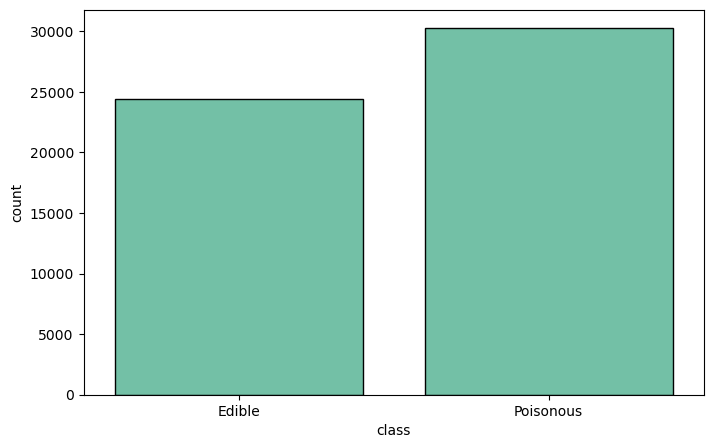

In [119]:
# graficamos nuestra variable respuesta

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_final, x = "class", color = "mediumaquamarine", edgecolor='black')
fig1.set(xticklabels=["Edible", "Poisonous"]) 
plt.show(); 

In [120]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en train y test como aprendimos en la lecciones de regresion lineal
y = df_final['class']
X = df_final.drop('class', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [121]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train) 

In [122]:
y_train.value_counts()

p    21157
e    17110
Name: class, dtype: int64

In [123]:
y_train_res.value_counts()

e    21146
p    21146
Name: class, dtype: int64

In [124]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribución antes del ajuste \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribución antes del ajuste 
 p    21157
e    17110
Name: class, dtype: int64
..............................................................
Distribución después del ajuste 
 e    21146
p    21146
Name: class, dtype: int64


In [127]:
balanceado = pd.concat([X_train_res,y_train_res], axis = 1)

In [128]:
balanceado.head()

,has-ring,cap-diameter_e,stem-height_e,stem-width_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w,class
0,0,-0.612327,0.155484,0.060904,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,p
1,0,-0.600231,-0.417199,-0.551196,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,p
2,0,-0.579062,0.728167,-0.296154,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,e
3,0,0.718238,-2.093681,0.794321,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,p
4,0,1.779666,0.972942,2.047471,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,e


## Guardad el dataframe 

In [129]:
df_final.to_pickle("../datos/setas/setas_encod.pkl")

In [130]:
balanceado.to_pickle('../datos/setas/setas_balance.pkl')